In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from scipy.stats import skew,kurtosis

In [2]:
data = pd.read_excel(r'C:\Users\Nitish\Desktop\Backup\Python\Datasets\car_data1.xlsx')

In [3]:
data['persons'].value_counts()

2       576
more    576
4       576
Name: persons, dtype: int64

In [4]:
data['buying'].replace(('vhigh','high','med','low'),('0','1','2','3'),inplace = True)

In [5]:
data['maint'].replace(('vhigh','high','med','low'),('0','1','2','3'),inplace = True)

In [6]:
data['lug_boot'].replace(('small','big','med'),('0','1','2'),inplace = True)

In [7]:
data['safety'].replace(('high','low','med'),('0','1','2'),inplace = True)
data['class'].replace(('vgood','unacc','good','acc'),('0','1','2','3'),inplace = True)


In [8]:
data['doors'].replace('5more','5',inplace = True)
data['persons'].replace('more','1',inplace = True)

In [9]:
data.columns.value_counts()

class       1
persons     1
lug_boot    1
maint       1
buying      1
safety      1
doors       1
dtype: int64

In [10]:
X = data.iloc[:,[0,1,2,3,4,5]]
y = data.iloc[:,6]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
y_pred = clf.predict(X_test)

In [50]:
clf.score(X_train,y_train)

0.8461538461538461

In [51]:
from sklearn.metrics import confusion_matrix


In [52]:
confusion_matrix(y_test,y_pred)

array([[  3,   8,   0,   5],
       [  0, 344,   0,  19],
       [  2,   9,   6,   8],
       [  0,  33,   1,  81]], dtype=int64)

In [53]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,2,2,0,1,1
1,0,0,2,2,0,2,1
2,0,0,2,2,0,0,1
3,0,0,2,2,2,1,1
4,0,0,2,2,2,2,1


In [54]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

features = list(X)
features



['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

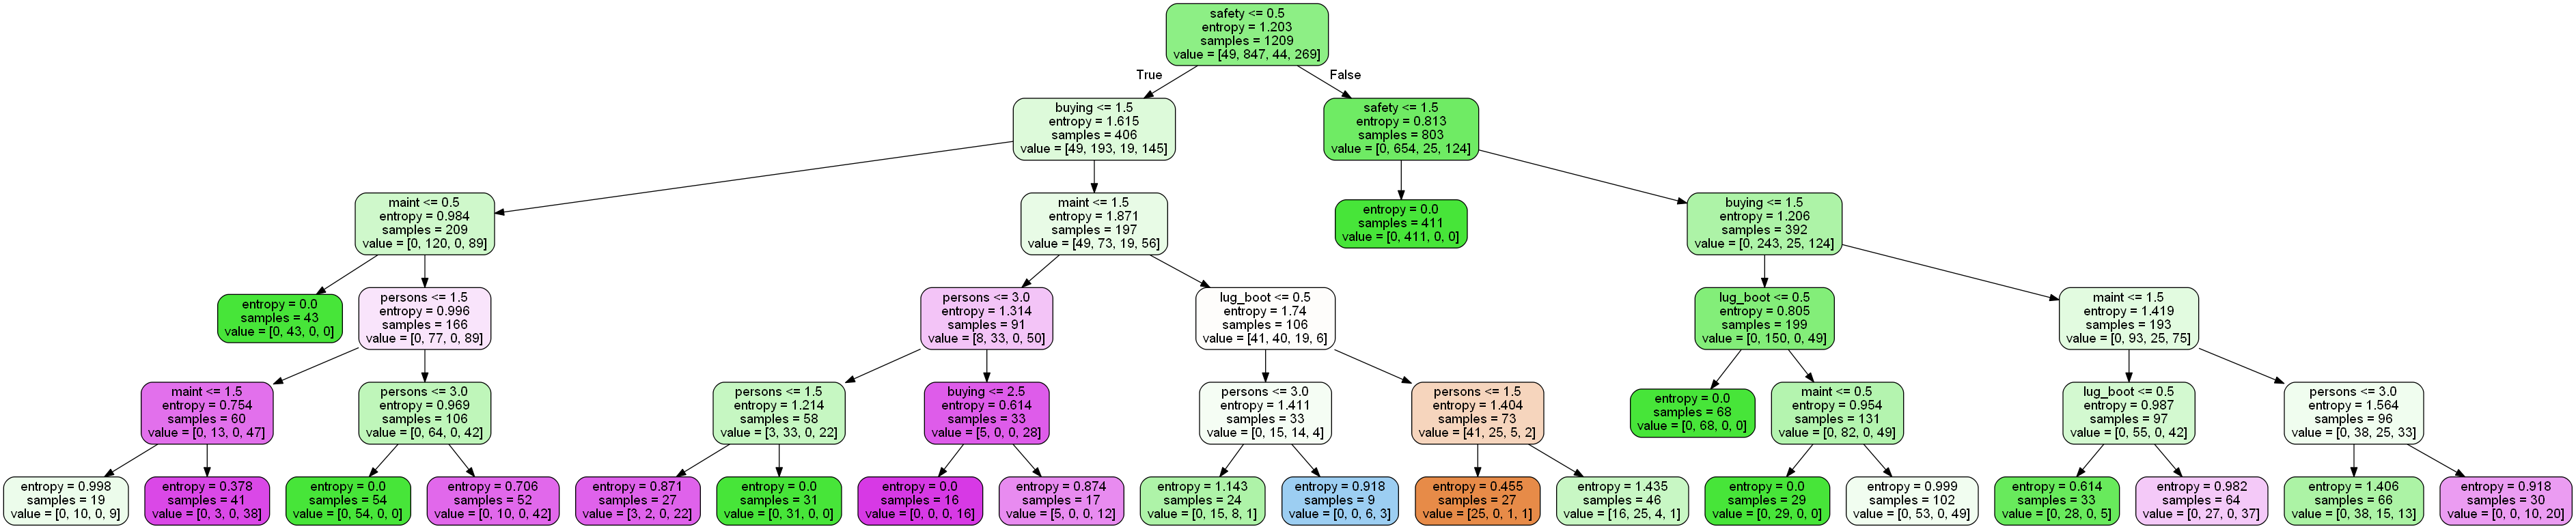

In [55]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names = features,
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cars.png')
Image(graph.create_png())